In [1]:
import openpyxl
import matplotlib as mp
import matplotlib.pyplot as plt
import sklearn as sl
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
import xgboost as xgb
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
AA="C:/Users/ganes/onedrive/Desktop/AI/NCCO2R/NC-Final.xlsx"
df=pd.read_excel(AA)
df.head(5)
df=pd.read_excel(AA)
df.head(5)
df.shape 

(477, 19)

In [3]:
X = pd.read_excel(AA, usecols='A:P') 
Y=pd.read_excel(AA, usecols='R')


In [4]:
import seaborn as sns

In [8]:
from sklearn.ensemble import RandomForestRegressor


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y.values.ravel(), test_size=0.2, random_state=22)

# Define the Random Forest model
rf_model = RandomForestRegressor(random_state=22)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],    # Depth of each tree
    'max_features': ['sqrt', 'log2', None],  # Use valid options
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at a leaf node
}
# Create GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf_model, param_grid, cv=10, n_jobs=-1, verbose=1, error_score='raise')

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Retrieve the best model and parameters
best_model = grid_search.best_estimator_
print("Best parameters found: ", grid_search.best_params_)

# Evaluate performance on the training set with the best model
y_train_pred_best = best_model.predict(X_train)
train_rmse_best = np.sqrt(mean_squared_error(y_train, y_train_pred_best))
train_r2_best = r2_score(y_train, y_train_pred_best)
train_mae_best = mean_absolute_error(y_train, y_train_pred_best)

# Print performance metrics for the training set with the best model
print(f"Best Model Training RMSE: {train_rmse_best}")
print(f"Best Model Training R²: {train_r2_best}")
print(f"Best Model Training MAE: {train_mae_best}")

# Evaluate performance on the test set with the best model
y_test_pred_best = best_model.predict(X_test)
test_rmse_best = np.sqrt(mean_squared_error(y_test, y_test_pred_best))
test_r2_best = r2_score(y_test, y_test_pred_best)
test_mae_best = mean_absolute_error(y_test, y_test_pred_best)

# Print performance metrics for the test set with the best model
print(f"Best Model Test RMSE: {test_rmse_best}")
print(f"Best Model Test R²: {test_r2_best}")
print(f"Best Model Test MAE: {test_mae_best}")


Fitting 10 folds for each of 243 candidates, totalling 2430 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Model Training RMSE: 3.6465335817647366
Best Model Training R²: 0.9805534906795349
Best Model Training MAE: 2.4128803085103656
Best Model Test RMSE: 8.691933514779954
Best Model Test R²: 0.878013743228818
Best Model Test MAE: 5.9633940487007635


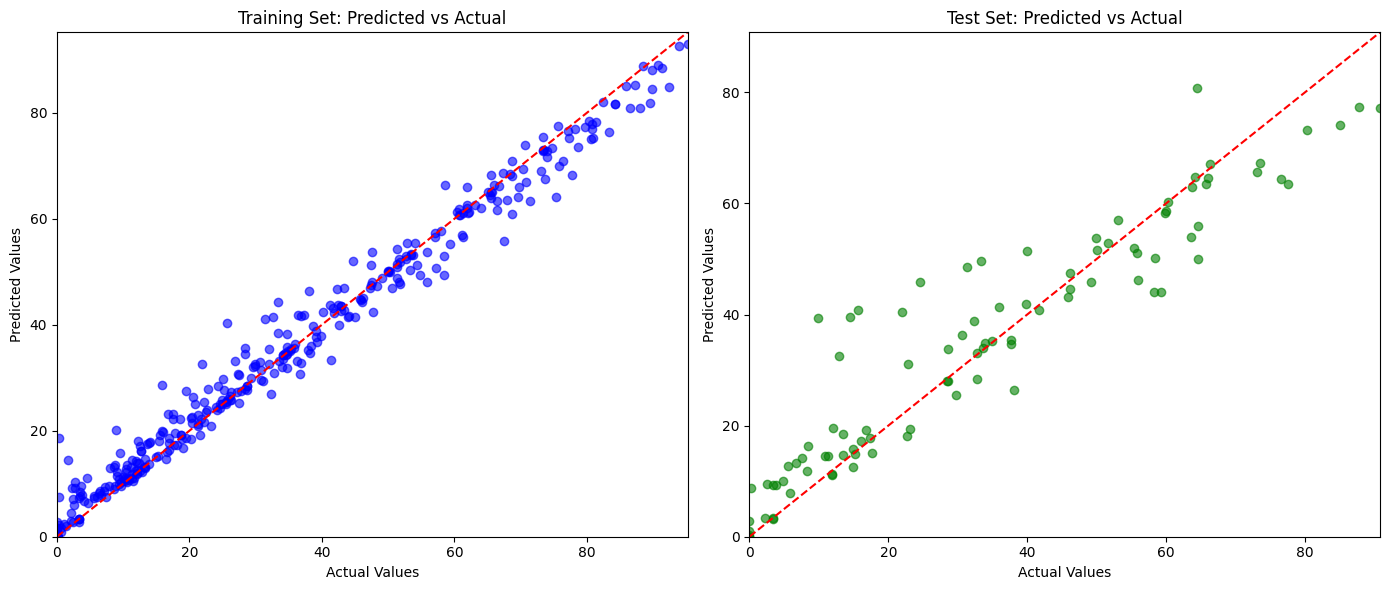

In [9]:
# Scatter plot for training set predictions
plt.figure(figsize=(14, 6))

# Training Set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_best, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Training Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_train.min(), y_train.max()])
plt.ylim([y_train.min(), y_train.max()])

# Test Set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_best, color='green', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Diagonal line
plt.title('Test Set: Predicted vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])

plt.tight_layout()
plt.show()